In [50]:
import pandas as pd 
import os
os.chdir("/home/abhisek/Studies/Coursera/Regression")

In [51]:
df=pd.read_csv("kc_house_train_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
X=df.iloc[:,[5]]
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [53]:
y=df.iloc[:,[2]]
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [83]:
y_pred=model.predict(X)
y_pred

array([[285595.35169091],
       [677518.13877709],
       [169992.22744247],
       ...,
       [384280.94556153],
       [404018.06433565],
       [240481.93735006]])

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

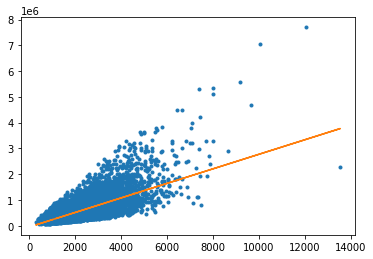

In [91]:
plt.plot(df['sqft_living'],df['price'],'.',
        df['sqft_living'],y_pred,'-')

In [58]:
print("squarfeet_slope",model.coef_)
print("squarefeet_intercept",model.intercept_)

squarfeet_slope [[281.95883963]]
squarefeet_intercept [-47116.07907289]


In [59]:
# calculate price of any given data 
def regression_prediction(features,intercept,slope):
    return intercept+(slope*features)

In [60]:
regression_prediction(2650,model.intercept_,model.coef_)

array([[700074.84594751]])

In [61]:
## Calculate MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

69139343889.62743

In [64]:
## RSS
((y-y_pred)**2).sum()

price    1.201918e+15
dtype: float64

In [65]:
def inverse_regression_predictions(output, intercept, slope):
    x=(output-intercept)/slope
    return x

In [67]:
inverse_regression_predictions(800000,model.intercept_,model.coef_)

array([[3004.39624515]])

In [76]:
Z=df.iloc[:,[3]]
Z.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [77]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [78]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(Z,y)

LinearRegression()

In [84]:
y_predic=model2.predict(Z)
y_predic

array([[492240.03642492],
       [492240.03642492],
       [364651.08349093],
       ...,
       [492240.03642492],
       [492240.03642492],
       [364651.08349093]])

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

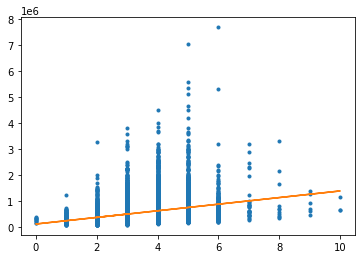

In [89]:
plt.plot(df['bedrooms'],df['price'],'.',
        df['bedrooms'],y_predic,'-')

In [92]:
print("slope_bedrooms",model2.coef_)
print("intercept_bedrooms",model2.intercept_)

slope_bedrooms [[127588.95293399]]
intercept_bedrooms [109473.17762296]


In [93]:
## Rss 
((y-y_predic)**2).sum()

price    2.143244e+15
dtype: float64